In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from edward.models import Categorical, Normal
import edward as ed
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Import data

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 38)

In [3]:
df = pd.read_csv('zar_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 37 columns):
RSI              4986 non-null float64
TSI              4986 non-null float64
ATR              4986 non-null float64
BHBI             4986 non-null float64
BBL              4986 non-null float64
BBH              4986 non-null float64
BLBI             4986 non-null float64
BBMAVG           4986 non-null float64
DCH              4986 non-null float64
DCHI             4986 non-null float64
DCL              4986 non-null float64
DCLI             4986 non-null float64
KCC              4986 non-null float64
KCH              4986 non-null float64
KCL              4986 non-null float64
ADX              4986 non-null float64
ADXI             4986 non-null int64
ADXN             4986 non-null float64
ADXP             4986 non-null float64
CCI              4986 non-null float64
DPO              4986 non-null float64
SEMA             4986 non-null float64
LEMA             4986 non-null float6

In [5]:
df.head()

,RSI,TSI,ATR,BHBI,BBL,BBH,BLBI,BBMAVG,DCH,DCHI,DCL,DCLI,KCC,KCH,KCL,ADX,ADXI,ADXN,ADXP,CCI,DPO,SEMA,LEMA,Ichimoku,Ichimoku_b,KST,KST_SIG,MACD,MACD_DIFF,MACD_SIG,MI,TRIX,VIN,VIP,CR,DR,target_return
0,43.632329,-48.931794,0.283673,0.0,12.254784,12.811276,0.0,12.533030,12.7643,0.0,12.2576,0.0,12.510137,12.742097,12.278177,26.940517,1,13.919518,19.671536,22.243310,-0.097030,12.592882,12.680380,12.863125,12.91355,0.0,0.0,-0.087498,-0.009998,-0.077500,25.0,0.0,0.770075,0.826272,-9.487600,0.101136,0.104821
1,42.841673,-47.001759,0.270709,0.0,12.253952,12.809598,0.0,12.531775,12.7643,0.0,12.2576,0.0,12.489833,12.709423,12.270243,25.806102,1,14.410242,19.432229,3.234104,0.043225,12.588649,12.673075,12.863125,12.91355,0.0,0.0,-0.084426,-0.006209,-0.078217,25.0,0.0,0.790299,0.822825,-9.688499,-0.221957,0.087864
2,41.596963,-45.383468,0.267722,0.0,12.254218,12.790412,0.0,12.522315,12.7643,0.0,12.2576,0.0,12.474360,12.686850,12.261870,25.556693,1,13.369490,21.389649,10.014418,-0.192315,12.581232,12.664028,12.863125,12.91355,0.0,0.0,-0.082796,-0.004106,-0.078689,25.0,0.0,0.773977,0.825961,-9.998128,-0.342845,0.074533
3,45.064838,-43.544253,0.265250,0.0,12.259743,12.773587,0.0,12.516665,12.7643,0.0,12.2576,0.0,12.482777,12.690547,12.275007,24.743157,1,13.605123,18.952411,57.152077,-0.259065,12.581649,12.660045,12.863125,12.91355,0.0,0.0,-0.078396,0.000263,-0.078659,25.0,0.0,0.780485,0.829506,-9.370230,0.697650,0.069004
4,49.500781,-41.365505,0.259295,0.0,12.255269,12.796551,0.0,12.525910,12.7643,0.0,12.2576,0.0,12.501070,12.704690,12.297450,23.894946,1,14.201246,19.216556,73.089548,-0.224910,12.591890,12.662402,12.863125,12.91355,0.0,0.0,-0.070512,0.007312,-0.077824,25.0,0.0,0.783207,0.809920,-8.503269,0.956596,0.047329


In [6]:
df.describe()

,RSI,TSI,ATR,BHBI,BBL,BBH,BLBI,BBMAVG,DCH,DCHI,DCL,DCLI,KCC,KCH,KCL,ADX,ADXI,ADXN,ADXP,CCI,DPO,SEMA,LEMA,Ichimoku,Ichimoku_b,KST,KST_SIG,MACD,MACD_DIFF,MACD_SIG,MI,TRIX,VIN,VIP,CR,DR,target_return
count,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000
mean,49.212016,-2.475847,0.175485,0.055756,8.594575,9.201108,0.049138,8.897842,9.169933,0.127758,8.651419,0.136582,8.893396,9.039458,8.747335,32.593258,0.562575,15.399329,17.087337,1.109761,-0.004564,8.901258,8.919454,8.957100,9.013987,-2.068242,-2.042787,-0.018195,0.000143,-0.018339,24.938371,-0.014316,0.844547,0.837899,-36.016448,-0.008286,0.005991
std,11.201368,14.267787,0.090946,0.229473,2.446547,2.671713,0.216177,2.553135,2.657266,0.333853,2.462980,0.343440,2.555714,2.606215,2.506880,10.196964,0.496119,6.779694,6.542295,88.115298,0.150277,2.548697,2.538965,2.571744,2.586537,37.798627,36.969795,0.153140,0.047964,0.144572,1.133913,0.158551,0.126742,0.138483,18.414628,1.071939,0.056479
min,20.580249,-48.931794,0.034036,0.000000,5.445254,5.860395,0.000000,5.714170,5.852500,0.000000,5.617500,0.000000,5.656730,5.741710,5.565343,10.704324,0.000000,0.000000,0.601827,-213.922531,-0.903170,5.784461,5.851660,5.772900,5.871000,-185.931142,-179.618546,-0.541263,-0.266320,-0.502235,19.667595,-0.777749,0.455847,0.377999,-59.550246,-14.355483,-0.163347
25%,40.919232,-12.291063,0.115855,0.000000,6.740628,7.156310,0.000000,6.950494,7.138800,0.000000,6.779800,0.000000,6.944014,7.038047,6.838578,25.011579,0.000000,10.240828,12.304950,-74.076084,-0.079023,6.950209,6.979550,6.979750,7.008950,-25.600464,-24.811994,-0.098988,-0.023082,-0.093724,24.339105,-0.107784,0.752665,0.738773,-50.025022,-0.558390,-0.030392
50%,49.011589,-3.018942,0.154659,0.000000,7.621030,8.164297,0.000000,7.898105,8.145000,0.000000,7.714000,0.000000,7.897095,8.017933,7.751230,31.178475,1.000000,14.921790,17.164538,-1.731860,-0.002743,7.880237,7.886543,7.931150,7.873875,-1.546859,-1.699575,-0.022722,0.005847,-0.021198,25.037404,-0.012648,0.844499,0.846893,-43.264855,0.011256,0.003894
75%,57.339211,7.455235,0.208725,0.000000,10.249955,10.810774,0.000000,10.543658,10.779400,0.000000,10.299300,0.000000,10.552527,10.695993,10.409216,39.202557,1.000000,20.180019,21.801542,76.291369,0.075075,10.521930,10.547906,10.633625,10.645350,22.562842,21.733268,0.071283,0.029876,0.064511,25.658512,0.088732,0.938994,0.945606,-24.138260,0.575065,0.037830
max,82.078451,42.796251,0.884482,1.000000,15.800886,17.312431,1.000000,16.428600,16.871700,1.000000,15.890700,1.000000,16.698263,17.163813,16.321317,65.793277,1.000000,36.279556,44.210028,224.633521,1.292130,16.343554,15.983428,16.960750,16.489100,123.074193,116.146565,0.513801,0.154672,0.457390,28.832905,0.513534,1.381195,1.181984,21.487514,6.854643,0.409077


## Create Labels For Data, Classification and Regression Labels

In [7]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [8]:
scaler = StandardScaler()

In [9]:
df['target_clf'] = df['target_return'].apply(lambda x: float(x/abs(x)) if x!=0 else -1)

In [10]:
df['target_clf'] = df['target_clf'].apply(lambda x: x if x==1 else 0)

In [11]:
df.rename(columns = {'target_return':'target_reg'}, inplace = True)

In [12]:
df.head()

,RSI,TSI,ATR,BHBI,BBL,BBH,BLBI,BBMAVG,DCH,DCHI,DCL,DCLI,KCC,KCH,KCL,ADX,ADXI,ADXN,ADXP,CCI,DPO,SEMA,LEMA,Ichimoku,Ichimoku_b,KST,KST_SIG,MACD,MACD_DIFF,MACD_SIG,MI,TRIX,VIN,VIP,CR,DR,target_reg,target_clf
0,43.632329,-48.931794,0.283673,0.0,12.254784,12.811276,0.0,12.533030,12.7643,0.0,12.2576,0.0,12.510137,12.742097,12.278177,26.940517,1,13.919518,19.671536,22.243310,-0.097030,12.592882,12.680380,12.863125,12.91355,0.0,0.0,-0.087498,-0.009998,-0.077500,25.0,0.0,0.770075,0.826272,-9.487600,0.101136,0.104821,1.0
1,42.841673,-47.001759,0.270709,0.0,12.253952,12.809598,0.0,12.531775,12.7643,0.0,12.2576,0.0,12.489833,12.709423,12.270243,25.806102,1,14.410242,19.432229,3.234104,0.043225,12.588649,12.673075,12.863125,12.91355,0.0,0.0,-0.084426,-0.006209,-0.078217,25.0,0.0,0.790299,0.822825,-9.688499,-0.221957,0.087864,1.0
2,41.596963,-45.383468,0.267722,0.0,12.254218,12.790412,0.0,12.522315,12.7643,0.0,12.2576,0.0,12.474360,12.686850,12.261870,25.556693,1,13.369490,21.389649,10.014418,-0.192315,12.581232,12.664028,12.863125,12.91355,0.0,0.0,-0.082796,-0.004106,-0.078689,25.0,0.0,0.773977,0.825961,-9.998128,-0.342845,0.074533,1.0
3,45.064838,-43.544253,0.265250,0.0,12.259743,12.773587,0.0,12.516665,12.7643,0.0,12.2576,0.0,12.482777,12.690547,12.275007,24.743157,1,13.605123,18.952411,57.152077,-0.259065,12.581649,12.660045,12.863125,12.91355,0.0,0.0,-0.078396,0.000263,-0.078659,25.0,0.0,0.780485,0.829506,-9.370230,0.697650,0.069004,1.0
4,49.500781,-41.365505,0.259295,0.0,12.255269,12.796551,0.0,12.525910,12.7643,0.0,12.2576,0.0,12.501070,12.704690,12.297450,23.894946,1,14.201246,19.216556,73.089548,-0.224910,12.591890,12.662402,12.863125,12.91355,0.0,0.0,-0.070512,0.007312,-0.077824,25.0,0.0,0.783207,0.809920,-8.503269,0.956596,0.047329,1.0


In [13]:
df.describe()

,RSI,TSI,ATR,BHBI,BBL,BBH,BLBI,BBMAVG,DCH,DCHI,DCL,DCLI,KCC,KCH,KCL,ADX,ADXI,ADXN,ADXP,CCI,DPO,SEMA,LEMA,Ichimoku,Ichimoku_b,KST,KST_SIG,MACD,MACD_DIFF,MACD_SIG,MI,TRIX,VIN,VIP,CR,DR,target_reg,target_clf
count,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000
mean,49.212016,-2.475847,0.175485,0.055756,8.594575,9.201108,0.049138,8.897842,9.169933,0.127758,8.651419,0.136582,8.893396,9.039458,8.747335,32.593258,0.562575,15.399329,17.087337,1.109761,-0.004564,8.901258,8.919454,8.957100,9.013987,-2.068242,-2.042787,-0.018195,0.000143,-0.018339,24.938371,-0.014316,0.844547,0.837899,-36.016448,-0.008286,0.005991,0.529081
std,11.201368,14.267787,0.090946,0.229473,2.446547,2.671713,0.216177,2.553135,2.657266,0.333853,2.462980,0.343440,2.555714,2.606215,2.506880,10.196964,0.496119,6.779694,6.542295,88.115298,0.150277,2.548697,2.538965,2.571744,2.586537,37.798627,36.969795,0.153140,0.047964,0.144572,1.133913,0.158551,0.126742,0.138483,18.414628,1.071939,0.056479,0.499204
min,20.580249,-48.931794,0.034036,0.000000,5.445254,5.860395,0.000000,5.714170,5.852500,0.000000,5.617500,0.000000,5.656730,5.741710,5.565343,10.704324,0.000000,0.000000,0.601827,-213.922531,-0.903170,5.784461,5.851660,5.772900,5.871000,-185.931142,-179.618546,-0.541263,-0.266320,-0.502235,19.667595,-0.777749,0.455847,0.377999,-59.550246,-14.355483,-0.163347,0.000000
25%,40.919232,-12.291063,0.115855,0.000000,6.740628,7.156310,0.000000,6.950494,7.138800,0.000000,6.779800,0.000000,6.944014,7.038047,6.838578,25.011579,0.000000,10.240828,12.304950,-74.076084,-0.079023,6.950209,6.979550,6.979750,7.008950,-25.600464,-24.811994,-0.098988,-0.023082,-0.093724,24.339105,-0.107784,0.752665,0.738773,-50.025022,-0.558390,-0.030392,0.000000
50%,49.011589,-3.018942,0.154659,0.000000,7.621030,8.164297,0.000000,7.898105,8.145000,0.000000,7.714000,0.000000,7.897095,8.017933,7.751230,31.178475,1.000000,14.921790,17.164538,-1.731860,-0.002743,7.880237,7.886543,7.931150,7.873875,-1.546859,-1.699575,-0.022722,0.005847,-0.021198,25.037404,-0.012648,0.844499,0.846893,-43.264855,0.011256,0.003894,1.000000
75%,57.339211,7.455235,0.208725,0.000000,10.249955,10.810774,0.000000,10.543658,10.779400,0.000000,10.299300,0.000000,10.552527,10.695993,10.409216,39.202557,1.000000,20.180019,21.801542,76.291369,0.075075,10.521930,10.547906,10.633625,10.645350,22.562842,21.733268,0.071283,0.029876,0.064511,25.658512,0.088732,0.938994,0.945606,-24.138260,0.575065,0.037830,1.000000
max,82.078451,42.796251,0.884482,1.000000,15.800886,17.312431,1.000000,16.428600,16.871700,1.000000,15.890700,1.000000,16.698263,17.163813,16.321317,65.793277,1.000000,36.279556,44.210028,224.633521,1.292130,16.343554,15.983428,16.960750,16.489100,123.074193,116.146565,0.513801,0.154672,0.457390,28.832905,0.513534,1.381195,1.181984,21.487514,6.854643,0.409077,1.000000


In [14]:
df.columns

Index(['RSI', 'TSI', 'ATR', 'BHBI', 'BBL', 'BBH', 'BLBI', 'BBMAVG', 'DCH',
       'DCHI', 'DCL', 'DCLI', 'KCC', 'KCH', 'KCL', 'ADX', 'ADXI', 'ADXN',
       'ADXP', 'CCI', 'DPO', 'SEMA', 'LEMA', 'Ichimoku', 'Ichimoku_b', 'KST',
       'KST_SIG', 'MACD', 'MACD_DIFF', 'MACD_SIG', 'MI', 'TRIX', 'VIN', 'VIP',
       'CR', 'DR', 'target_reg', 'target_clf'],
      dtype='object')

In [15]:
df.head()

,RSI,TSI,ATR,BHBI,BBL,BBH,BLBI,BBMAVG,DCH,DCHI,DCL,DCLI,KCC,KCH,KCL,ADX,ADXI,ADXN,ADXP,CCI,DPO,SEMA,LEMA,Ichimoku,Ichimoku_b,KST,KST_SIG,MACD,MACD_DIFF,MACD_SIG,MI,TRIX,VIN,VIP,CR,DR,target_reg,target_clf
0,43.632329,-48.931794,0.283673,0.0,12.254784,12.811276,0.0,12.533030,12.7643,0.0,12.2576,0.0,12.510137,12.742097,12.278177,26.940517,1,13.919518,19.671536,22.243310,-0.097030,12.592882,12.680380,12.863125,12.91355,0.0,0.0,-0.087498,-0.009998,-0.077500,25.0,0.0,0.770075,0.826272,-9.487600,0.101136,0.104821,1.0
1,42.841673,-47.001759,0.270709,0.0,12.253952,12.809598,0.0,12.531775,12.7643,0.0,12.2576,0.0,12.489833,12.709423,12.270243,25.806102,1,14.410242,19.432229,3.234104,0.043225,12.588649,12.673075,12.863125,12.91355,0.0,0.0,-0.084426,-0.006209,-0.078217,25.0,0.0,0.790299,0.822825,-9.688499,-0.221957,0.087864,1.0
2,41.596963,-45.383468,0.267722,0.0,12.254218,12.790412,0.0,12.522315,12.7643,0.0,12.2576,0.0,12.474360,12.686850,12.261870,25.556693,1,13.369490,21.389649,10.014418,-0.192315,12.581232,12.664028,12.863125,12.91355,0.0,0.0,-0.082796,-0.004106,-0.078689,25.0,0.0,0.773977,0.825961,-9.998128,-0.342845,0.074533,1.0
3,45.064838,-43.544253,0.265250,0.0,12.259743,12.773587,0.0,12.516665,12.7643,0.0,12.2576,0.0,12.482777,12.690547,12.275007,24.743157,1,13.605123,18.952411,57.152077,-0.259065,12.581649,12.660045,12.863125,12.91355,0.0,0.0,-0.078396,0.000263,-0.078659,25.0,0.0,0.780485,0.829506,-9.370230,0.697650,0.069004,1.0
4,49.500781,-41.365505,0.259295,0.0,12.255269,12.796551,0.0,12.525910,12.7643,0.0,12.2576,0.0,12.501070,12.704690,12.297450,23.894946,1,14.201246,19.216556,73.089548,-0.224910,12.591890,12.662402,12.863125,12.91355,0.0,0.0,-0.070512,0.007312,-0.077824,25.0,0.0,0.783207,0.809920,-8.503269,0.956596,0.047329,1.0


In [16]:
X = df[['RSI', 'TSI', 'ATR', 'BHBI', 'BBL', 'BBH', 'BLBI', 'BBMAVG', 'DCH',
       'DCHI', 'DCL', 'DCLI', 'KCC', 'KCH', 'KCL', 'ADX', 'ADXI', 'ADXN',
       'ADXP', 'CCI', 'DPO', 'SEMA', 'LEMA', 'Ichimoku', 'Ichimoku_b', 'KST',
       'KST_SIG', 'MACD', 'MACD_DIFF', 'MACD_SIG', 'MI', 'TRIX', 'VIN', 'VIP',
       'CR', 'DR']].as_matrix()

C:\Users\Spare\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [17]:
y_cl = df['target_clf'].as_matrix()

C:\Users\Spare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cl, test_size=0.20)

## Function for Feeding Data In Batches

In [19]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [20]:
X.shape

(4986, 36)

## Build Bayesian Model

In [21]:
N = 100   # number of rows in a minibatch.
D = 36   # number of features.
K = 2    # number of classes.

In [22]:
# Create a placeholder to hold the data (in minibatches) in a TensorFlow graph.
x = tf.placeholder(tf.float32, [None, D])
# Normal(0,1) priors for the variables. Note that the syntax assumes TensorFlow 1.1.
w = Normal(loc=tf.zeros([D, K]), scale=tf.ones([D, K]))
b = Normal(loc=tf.zeros(K), scale=tf.ones(K))
# Categorical likelihood for classication.
y = Categorical(tf.matmul(x,w)+b)

In [23]:
# Contruct the q(w) and q(b). in this case we assume Normal distributions.
qw = Normal(loc=tf.Variable(tf.random_normal([D, K])),
              scale=tf.nn.softplus(tf.Variable(tf.random_normal([D, K]))))
qb = Normal(loc=tf.Variable(tf.random_normal([K])),
              scale=tf.nn.softplus(tf.Variable(tf.random_normal([K]))))

In [24]:
# We use a placeholder for the labels in anticipation of the traning data.
y_ph = tf.placeholder(tf.int32, [N])
# Define the VI inference technique, ie. minimise the KL divergence between q and p.
inference = ed.KLqp({w: qw, b: qb}, data={y:y_ph})

In [25]:
# Initialse the infernce variables
inference.initialize(n_iter=5000, n_print=100, scale={y: float(X_train.shape[0]) / N})

In [26]:
# We will use an interactive session.
sess = tf.InteractiveSession()
# Initialise all the vairables in the session.
tf.global_variables_initializer().run()

In [27]:
# Let the training begin. We load the data in minibatches and update the VI infernce using each new batch.
for _ in range(inference.n_iter):
    X_batch, Y_batch = next_batch(N, X_train, y_train)
    # TensorFlow method gives the label data in a one hot vetor format. We convert that into a single label.
    #Y_batch = np.argmax(Y_batch,axis=1)
    info_dict = inference.update(feed_dict={x: X_batch, y_ph: Y_batch})
    inference.print_progress(info_dict)

5000/5000 [100%] ██████████████████████████████ Elapsed: 13s | Loss: 2932.863


In [28]:
X_test = X_test.astype(np.float32)

In [29]:
X_test.dtype

dtype('float32')

In [30]:
# Generate samples the posterior and store them.
n_samples = 200
prob_lst = []
samples = []
w_samples = []
b_samples = []
for _ in range(n_samples):
    w_samp = qw.sample()
    b_samp = qb.sample()
    w_samples.append(w_samp)
    b_samples.append(b_samp)
    # Also compue the probabiliy of each class for each (w,b) sample.
    prob = tf.nn.softmax(tf.matmul( X_test,w_samp ) + b_samp)
    prob_lst.append(prob.eval())
    sample = tf.concat([tf.reshape(w_samp,[-1]),b_samp],0)
    samples.append(sample.eval())

## Compute The Accuracy Distribution For The Bayesian Neural Net

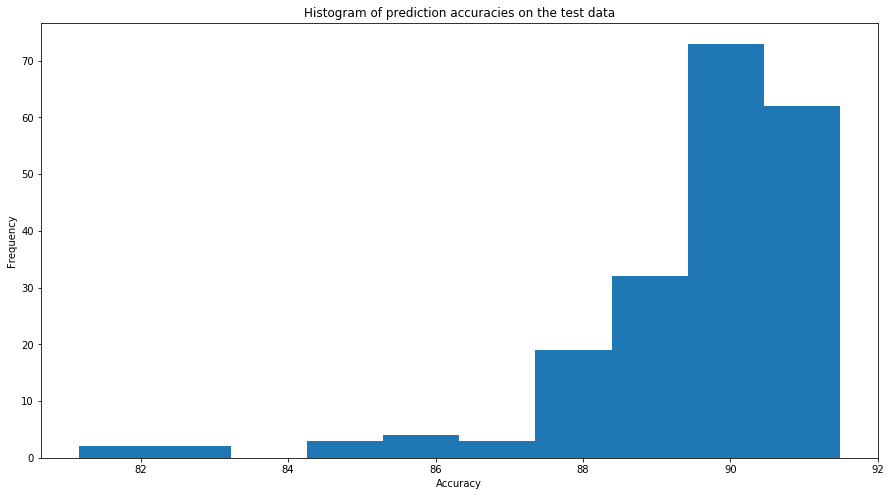

In [32]:
# Compute the accuracy of the model. 
# For each sample we compute the predicted class and compare with the test labels.
# Predicted class is defined as the one which as maximum proability.
# We perform this test for each (w,b) in the posterior giving us a set of accuracies
# Finally we make a histogram of accuracies for the test data.
fig, axes = plt.subplots(figsize = (15, 8))
accy_test = []
for prob in prob_lst:
    y_trn_prd = np.argmax(prob,axis=1).astype(np.float32)
    acc = (y_trn_prd == y_test).mean()*100
    accy_test.append(acc)

axes.hist(accy_test)
axes.set_title("Histogram of prediction accuracies on the test data")
axes.set_xlabel("Accuracy")# Compute the accuracy of the model. 
# For each sample we compute the predicted class and compare with the test labels.
# Predicted class is defined as the one which as maximum proability.
# We perform this test for each (w,b) in the posterior giving us a set of accuracies
# Finally we make a histogram of accuracies for the test data.
fig, axes = plt.subplots(figsize = (15, 8))
accy_test = []
for prob in prob_lst:
    y_trn_prd = np.argmax(prob,axis=1).astype(np.float32)
    acc = (y_trn_prd == y_test).mean()*100
    accy_test.append(acc)

axes.hist(accy_test)
axes.set_title("Histogram of prediction accuracies on the test data")
axes.set_xlabel("Accuracy")
axes.set_ylabel("Frequency")

fig.savefig('accuracy_plot.png')
axes.set_ylabel("Frequency")

fig.savefig('accuracy_plot.png')

In [33]:
# Here we compute the mean of probabilties for each class for all the (w,b) samples.
# We then use the class with maximum of the mean proabilities as the prediction. 
# In other words, we have used (w,b) samples to construct a set of models and
# used their combined outputs to make the predcitions.
Y_pred = np.argmax(np.mean(prob_lst,axis=0),axis=1)
print("accuracy in predicting the test data = ", (Y_pred == y_test).mean()*100)

accuracy in predicting the test data =  91.28256513026052


In [36]:
# Load the first row from the test data and its label.
test_row = X_test[2]
test_label = y_test[2]
print('truth = ',test_label)

truth =  0.0


In [40]:
# Now the check what the model perdicts for each (w,b) sample from the posterior. This may take a few seconds...
sing_img_probs = []
for w_samp,b_samp in zip(w_samples,b_samples):
    prob = tf.nn.softmax(tf.matmul( X_test[2:3],w_samp ) + b_samp)
    sing_img_probs.append(prob.eval())

Text(0,0.5,'Frequency')

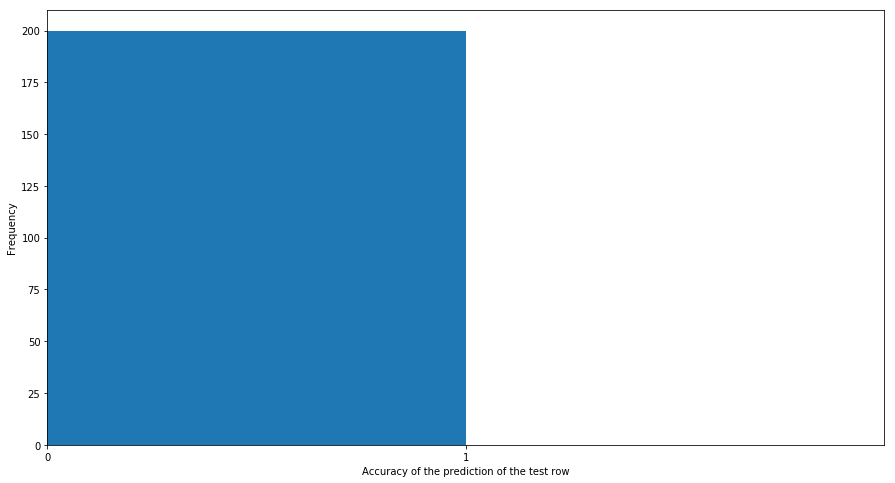

In [43]:
# Create a histogram of these predictions.
fig, axes = plt.subplots(figsize = (15, 8))
axes.hist(np.argmax(sing_img_probs,axis=2),bins = range(3))
axes.set_xticks(np.arange(0,2))
axes.set_xlim(0,2)
axes.set_xlabel("Accuracy of the prediction of the test row")
axes.set_ylabel("Frequency")

In [45]:
y_test.mean()

0.5531062124248497

# Test The Model On Brazil Data, We Should Get A wider Distribution Of Accuracies

## Brazil

In [46]:
brazil = pd.read_csv('brazil_clean.csv')

In [47]:
brazil.head()

,Date,RSI,TSI,ATR,BBH,BHBI,BBL,BLBI,BBMAVG,DCH,DCHI,DCL,DCLI,KCC,KCH,KCL,ADX,ADXI,ADXN,...,CCI,DPO,SEMA,LEMA,Ichimoku,Ichimoku_b,KST,KST_SIG,MACD,MACD_DIFF,MACD_SIG,MI,TRIX,VIN,VIP,CR,DR,target_return,target_cl
0,2018-06-05,50.390777,-5.464074,0.092945,3.923726,0.0,3.663304,0.0,3.793515,3.9113,0.0,3.7091,0.0,3.768330,3.849480,3.687180,36.193381,1,16.100378,...,4.024438,-0.071915,3.798568,3.809155,3.77745,3.74065,0.0,0.0,-0.010587,-0.000450,-0.010137,25.0,0.0,0.759124,0.772966,-0.768509,-1.095734,0.007745,1.0
1,2018-06-04,44.525250,-5.972670,0.092192,3.904520,0.0,3.665910,0.0,3.785215,3.9043,0.0,3.7091,0.0,3.767747,3.848257,3.687237,34.190772,1,15.663435,...,-46.379331,-0.065915,3.794128,3.805781,3.77745,3.74065,0.0,0.0,-0.011654,-0.001360,-0.010294,25.0,0.0,0.772102,0.738895,-2.430574,-1.674936,0.030732,1.0
2,2018-06-01,46.692697,-6.079345,0.088946,3.891176,0.0,3.668214,0.0,3.779695,3.9043,0.0,3.7091,0.0,3.768027,3.844577,3.691477,32.448130,1,15.666836,...,-28.425671,-0.068295,3.791806,3.803718,3.77745,3.74065,0.0,0.0,-0.011912,-0.001450,-0.010461,25.0,0.0,0.770895,0.722918,-1.888709,0.555363,0.022756,1.0
3,2018-05-30,43.037486,-6.707223,0.088014,3.880160,0.0,3.665570,0.0,3.772865,3.9043,0.0,3.7091,0.0,3.763837,3.835207,3.692467,31.262583,1,14.454684,...,-55.091263,-0.063765,3.786215,3.799628,3.77745,3.74065,0.0,0.0,-0.013413,-0.002648,-0.010765,25.0,0.0,0.760250,0.734707,-2.988069,-1.120523,0.042160,1.0
4,2018-05-29,43.229303,-7.211000,0.085714,3.866513,0.0,3.665537,0.0,3.766025,3.9043,0.0,3.7091,0.0,3.765943,3.837793,3.694093,30.231965,1,14.534841,...,-38.723773,0.138275,3.781251,3.795888,3.77745,3.74065,0.0,0.0,-0.014637,-0.003475,-0.011162,25.0,0.0,0.754250,0.740679,-2.943782,0.045651,0.040450,1.0


In [49]:
brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 39 columns):
Date             7616 non-null object
RSI              7616 non-null float64
TSI              7616 non-null float64
ATR              7616 non-null float64
BBH              7616 non-null float64
BHBI             7616 non-null float64
BBL              7616 non-null float64
BLBI             7616 non-null float64
BBMAVG           7616 non-null float64
DCH              7616 non-null float64
DCHI             7616 non-null float64
DCL              7616 non-null float64
DCLI             7616 non-null float64
KCC              7616 non-null float64
KCH              7616 non-null float64
KCL              7616 non-null float64
ADX              7616 non-null float64
ADXI             7616 non-null int64
ADXN             7616 non-null float64
ADXP             7616 non-null float64
CCI              7616 non-null float64
DPO              7616 non-null float64
SEMA             7616 non-null float64

In [50]:
brazil['Date'] = pd.to_datetime(brazil['Date'])

In [51]:
brazil.head()

,Date,RSI,TSI,ATR,BBH,BHBI,BBL,BLBI,BBMAVG,DCH,DCHI,DCL,DCLI,KCC,KCH,KCL,ADX,ADXI,ADXN,...,CCI,DPO,SEMA,LEMA,Ichimoku,Ichimoku_b,KST,KST_SIG,MACD,MACD_DIFF,MACD_SIG,MI,TRIX,VIN,VIP,CR,DR,target_return,target_cl
0,2018-06-05,50.390777,-5.464074,0.092945,3.923726,0.0,3.663304,0.0,3.793515,3.9113,0.0,3.7091,0.0,3.768330,3.849480,3.687180,36.193381,1,16.100378,...,4.024438,-0.071915,3.798568,3.809155,3.77745,3.74065,0.0,0.0,-0.010587,-0.000450,-0.010137,25.0,0.0,0.759124,0.772966,-0.768509,-1.095734,0.007745,1.0
1,2018-06-04,44.525250,-5.972670,0.092192,3.904520,0.0,3.665910,0.0,3.785215,3.9043,0.0,3.7091,0.0,3.767747,3.848257,3.687237,34.190772,1,15.663435,...,-46.379331,-0.065915,3.794128,3.805781,3.77745,3.74065,0.0,0.0,-0.011654,-0.001360,-0.010294,25.0,0.0,0.772102,0.738895,-2.430574,-1.674936,0.030732,1.0
2,2018-06-01,46.692697,-6.079345,0.088946,3.891176,0.0,3.668214,0.0,3.779695,3.9043,0.0,3.7091,0.0,3.768027,3.844577,3.691477,32.448130,1,15.666836,...,-28.425671,-0.068295,3.791806,3.803718,3.77745,3.74065,0.0,0.0,-0.011912,-0.001450,-0.010461,25.0,0.0,0.770895,0.722918,-1.888709,0.555363,0.022756,1.0
3,2018-05-30,43.037486,-6.707223,0.088014,3.880160,0.0,3.665570,0.0,3.772865,3.9043,0.0,3.7091,0.0,3.763837,3.835207,3.692467,31.262583,1,14.454684,...,-55.091263,-0.063765,3.786215,3.799628,3.77745,3.74065,0.0,0.0,-0.013413,-0.002648,-0.010765,25.0,0.0,0.760250,0.734707,-2.988069,-1.120523,0.042160,1.0
4,2018-05-29,43.229303,-7.211000,0.085714,3.866513,0.0,3.665537,0.0,3.766025,3.9043,0.0,3.7091,0.0,3.765943,3.837793,3.694093,30.231965,1,14.534841,...,-38.723773,0.138275,3.781251,3.795888,3.77745,3.74065,0.0,0.0,-0.014637,-0.003475,-0.011162,25.0,0.0,0.754250,0.740679,-2.943782,0.045651,0.040450,1.0


In [52]:
brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 39 columns):
Date             7616 non-null datetime64[ns]
RSI              7616 non-null float64
TSI              7616 non-null float64
ATR              7616 non-null float64
BBH              7616 non-null float64
BHBI             7616 non-null float64
BBL              7616 non-null float64
BLBI             7616 non-null float64
BBMAVG           7616 non-null float64
DCH              7616 non-null float64
DCHI             7616 non-null float64
DCL              7616 non-null float64
DCLI             7616 non-null float64
KCC              7616 non-null float64
KCH              7616 non-null float64
KCL              7616 non-null float64
ADX              7616 non-null float64
ADXI             7616 non-null int64
ADXN             7616 non-null float64
ADXP             7616 non-null float64
CCI              7616 non-null float64
DPO              7616 non-null float64
SEMA             7616 non-null

In [53]:
brazil['target_cl'] = brazil['target_cl'].apply(lambda x: x if x==1 else 0)

In [54]:
brazil.rename(columns = {'target_return':'target_reg'}, inplace = True)

In [55]:
brazil.head()

,Date,RSI,TSI,ATR,BBH,BHBI,BBL,BLBI,BBMAVG,DCH,DCHI,DCL,DCLI,KCC,KCH,KCL,ADX,ADXI,ADXN,...,CCI,DPO,SEMA,LEMA,Ichimoku,Ichimoku_b,KST,KST_SIG,MACD,MACD_DIFF,MACD_SIG,MI,TRIX,VIN,VIP,CR,DR,target_reg,target_cl
0,2018-06-05,50.390777,-5.464074,0.092945,3.923726,0.0,3.663304,0.0,3.793515,3.9113,0.0,3.7091,0.0,3.768330,3.849480,3.687180,36.193381,1,16.100378,...,4.024438,-0.071915,3.798568,3.809155,3.77745,3.74065,0.0,0.0,-0.010587,-0.000450,-0.010137,25.0,0.0,0.759124,0.772966,-0.768509,-1.095734,0.007745,1.0
1,2018-06-04,44.525250,-5.972670,0.092192,3.904520,0.0,3.665910,0.0,3.785215,3.9043,0.0,3.7091,0.0,3.767747,3.848257,3.687237,34.190772,1,15.663435,...,-46.379331,-0.065915,3.794128,3.805781,3.77745,3.74065,0.0,0.0,-0.011654,-0.001360,-0.010294,25.0,0.0,0.772102,0.738895,-2.430574,-1.674936,0.030732,1.0
2,2018-06-01,46.692697,-6.079345,0.088946,3.891176,0.0,3.668214,0.0,3.779695,3.9043,0.0,3.7091,0.0,3.768027,3.844577,3.691477,32.448130,1,15.666836,...,-28.425671,-0.068295,3.791806,3.803718,3.77745,3.74065,0.0,0.0,-0.011912,-0.001450,-0.010461,25.0,0.0,0.770895,0.722918,-1.888709,0.555363,0.022756,1.0
3,2018-05-30,43.037486,-6.707223,0.088014,3.880160,0.0,3.665570,0.0,3.772865,3.9043,0.0,3.7091,0.0,3.763837,3.835207,3.692467,31.262583,1,14.454684,...,-55.091263,-0.063765,3.786215,3.799628,3.77745,3.74065,0.0,0.0,-0.013413,-0.002648,-0.010765,25.0,0.0,0.760250,0.734707,-2.988069,-1.120523,0.042160,1.0
4,2018-05-29,43.229303,-7.211000,0.085714,3.866513,0.0,3.665537,0.0,3.766025,3.9043,0.0,3.7091,0.0,3.765943,3.837793,3.694093,30.231965,1,14.534841,...,-38.723773,0.138275,3.781251,3.795888,3.77745,3.74065,0.0,0.0,-0.014637,-0.003475,-0.011162,25.0,0.0,0.754250,0.740679,-2.943782,0.045651,0.040450,1.0


In [56]:
brazil.describe()

,RSI,TSI,ATR,BBH,BHBI,BBL,BLBI,BBMAVG,DCH,DCHI,DCL,DCLI,KCC,KCH,KCL,ADX,ADXI,ADXN,ADXP,CCI,DPO,SEMA,LEMA,Ichimoku,Ichimoku_b,KST,KST_SIG,MACD,MACD_DIFF,MACD_SIG,MI,TRIX,VIN,VIP,CR,DR,target_reg,target_cl
count,7.616000e+03,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7.616000e+03,7.616000e+03,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000
mean,4.294520e+01,-13.519265,0.029586,2.091999,0.051996,1.963144,0.051208,2.027572,2.084128,0.115546,1.976502,0.270483,2.026956,2.049651,2.004262,39.756275,0.451155,27.048506,18.748009,-16.635081,-0.000572,2.027974,2.029987,2.035764,2.044843,1.773651e+04,1.773655e+04,-0.002013,-0.000040,-0.001973,24.048026,0.134057,0.849409,0.779070,-47.219074,92.870387,0.040026,0.586003
std,1.923391e+01,34.343237,0.027210,0.970836,0.222033,0.913789,0.220436,0.933243,0.963157,0.319701,0.910524,0.444239,0.933881,0.949268,0.918791,21.127444,0.497641,21.886273,11.248471,90.793978,0.059615,0.931108,0.927008,0.938677,0.937856,2.671968e+05,2.616090e+05,0.066454,0.020311,0.062895,4.567379,12.799466,0.174170,0.177474,24.336356,8114.788375,0.152082,0.492580
min,3.641903e-10,-99.999896,0.000002,0.000500,0.000000,-1.817002,0.000000,0.000465,0.000500,0.000000,0.000400,0.000000,0.000430,0.000430,0.000430,10.950489,0.000000,0.000000,0.000000,-283.234100,-0.851545,0.000468,0.000552,0.000450,0.000550,-3.354635e+02,-3.226536e+02,-0.174793,-0.108289,-0.152143,0.509674,-1.645160,0.228687,0.000000,-99.989580,-20.000000,-0.999861,0.000000
25%,3.251498e+01,-26.655367,0.010968,1.636053,0.000000,1.545869,0.000000,1.593089,1.633300,0.000000,1.560000,0.000000,1.592255,1.601462,1.582284,25.598092,0.000000,13.961580,11.652044,-96.212629,-0.012165,1.602840,1.607027,1.593600,1.601738,-2.756128e+01,-2.703952e+01,-0.019881,-0.003632,-0.018769,23.745982,-0.118392,0.730394,0.657581,-58.577346,-0.447214,-0.019927,0.000000
50%,4.574402e+01,-5.793804,0.024572,2.158596,0.000000,2.019651,0.000000,2.089685,2.150000,0.000000,2.033350,0.000000,2.091400,2.111423,2.066487,33.625216,0.000000,21.000329,18.667753,-36.021577,-0.000865,2.083243,2.072437,2.096575,2.082000,-5.483363e+00,-5.457934e+00,-0.003591,0.000167,-0.003687,25.023231,-0.025742,0.849711,0.794851,-45.610379,-0.013043,0.007511,1.000000
75%,5.660315e+01,8.749235,0.039873,2.801924,0.000000,2.639620,0.000000,2.710275,2.786250,0.000000,2.650000,1.000000,2.713739,2.741792,2.683242,46.369296,1.000000,31.125828,25.190050,63.931408,0.010418,2.699322,2.693950,2.717056,2.726312,1.461294e+01,1.454340e+01,0.014505,0.005014,0.014112,25.942537,0.059337,0.981961,0.920579,-29.271088,0.306125,0.041431,1.000000
max,9.999504e+01,99.927932,0.198064,4.652391,1.000000,3.972145,1.000000,4.052670,4.179000,1.000000,3.999100,1.000000,4.080747,4.150860,4.025677,100.000000,1.000000,100.000000,99.992961,283.235276,1.838670,4.016938,3.937033,4.047350,4.006200,5.745311e+06,5.426882e+06,0.768106,0.358956,0.673053,39.408120,1075.409806,1.666667,1.213148,8.867816,708175.000000,0.699271,1.000000


In [58]:
brazil.set_index('Date', inplace = True)

In [59]:
brazil.head()

,RSI,TSI,ATR,BBH,BHBI,BBL,BLBI,BBMAVG,DCH,DCHI,DCL,DCLI,KCC,KCH,KCL,ADX,ADXI,ADXN,ADXP,CCI,DPO,SEMA,LEMA,Ichimoku,Ichimoku_b,KST,KST_SIG,MACD,MACD_DIFF,MACD_SIG,MI,TRIX,VIN,VIP,CR,DR,target_reg,target_cl
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-05,50.390777,-5.464074,0.092945,3.923726,0.0,3.663304,0.0,3.793515,3.9113,0.0,3.7091,0.0,3.768330,3.849480,3.687180,36.193381,1,16.100378,21.607817,4.024438,-0.071915,3.798568,3.809155,3.77745,3.74065,0.0,0.0,-0.010587,-0.000450,-0.010137,25.0,0.0,0.759124,0.772966,-0.768509,-1.095734,0.007745,1.0
2018-06-04,44.525250,-5.972670,0.092192,3.904520,0.0,3.665910,0.0,3.785215,3.9043,0.0,3.7091,0.0,3.767747,3.848257,3.687237,34.190772,1,15.663435,21.118507,-46.379331,-0.065915,3.794128,3.805781,3.77745,3.74065,0.0,0.0,-0.011654,-0.001360,-0.010294,25.0,0.0,0.772102,0.738895,-2.430574,-1.674936,0.030732,1.0
2018-06-01,46.692697,-6.079345,0.088946,3.891176,0.0,3.668214,0.0,3.779695,3.9043,0.0,3.7091,0.0,3.768027,3.844577,3.691477,32.448130,1,15.666836,21.238874,-28.425671,-0.068295,3.791806,3.803718,3.77745,3.74065,0.0,0.0,-0.011912,-0.001450,-0.010461,25.0,0.0,0.770895,0.722918,-1.888709,0.555363,0.022756,1.0
2018-05-30,43.037486,-6.707223,0.088014,3.880160,0.0,3.665570,0.0,3.772865,3.9043,0.0,3.7091,0.0,3.763837,3.835207,3.692467,31.262583,1,14.454684,21.297439,-55.091263,-0.063765,3.786215,3.799628,3.77745,3.74065,0.0,0.0,-0.013413,-0.002648,-0.010765,25.0,0.0,0.760250,0.734707,-2.988069,-1.120523,0.042160,1.0
2018-05-29,43.229303,-7.211000,0.085714,3.866513,0.0,3.665537,0.0,3.766025,3.9043,0.0,3.7091,0.0,3.765943,3.837793,3.694093,30.231965,1,14.534841,21.546881,-38.723773,0.138275,3.781251,3.795888,3.77745,3.74065,0.0,0.0,-0.014637,-0.003475,-0.011162,25.0,0.0,0.754250,0.740679,-2.943782,0.045651,0.040450,1.0


In [60]:
X_br = brazil[['RSI', 'TSI', 'ATR', 'BHBI', 'BBL', 'BBH', 'BLBI', 'BBMAVG', 'DCH',
       'DCHI', 'DCL', 'DCLI', 'KCC', 'KCH', 'KCL', 'ADX', 'ADXI', 'ADXN',
       'ADXP', 'CCI', 'DPO', 'SEMA', 'LEMA', 'Ichimoku', 'Ichimoku_b', 'KST',
       'KST_SIG', 'MACD', 'MACD_DIFF', 'MACD_SIG', 'MI', 'TRIX', 'VIN', 'VIP',
       'CR', 'DR']].as_matrix()

C:\Users\Spare\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [61]:
y_cl_br = brazil['target_cl'].as_matrix()

C:\Users\Spare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [62]:
X_br = X_br.astype(np.float32)

In [65]:
prob_lst_bra = []

for w_samp, b_samp in zip(w_samples, b_samples):
    # Also compue the probabiliy of each class for each (w,b) sample.
    prob = tf.nn.softmax(tf.matmul( X_br,w_samp ) + b_samp)
    prob_lst_bra.append(prob.eval())

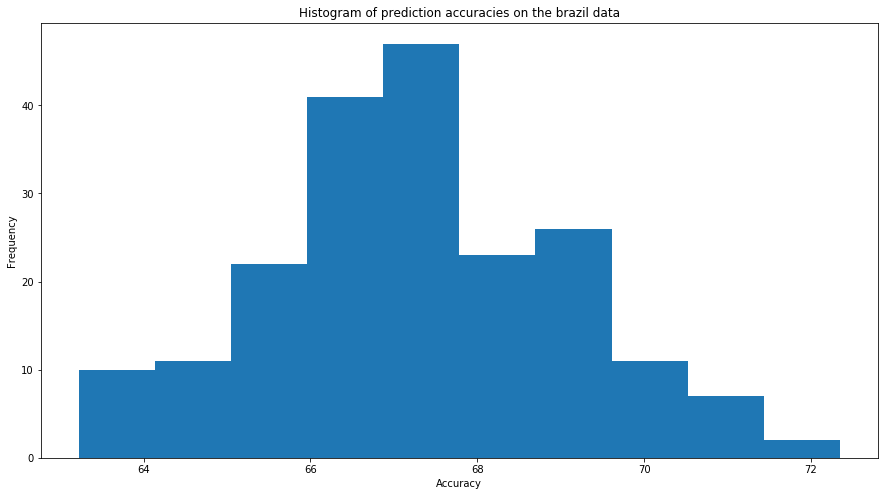

In [67]:
# Compute the accuracy of the model. 
# For each sample we compute the predicted class and compare with the test labels.
# Predicted class is defined as the one which as maximum proability.
# We perform this test for each (w,b) in the posterior giving us a set of accuracies
# Finally we make a histogram of accuracies for the test data.
fig, axes = plt.subplots(figsize = (15, 8))
accy_test = []
for prob in prob_lst_bra:
    y_trn_prd = np.argmax(prob,axis=1).astype(np.float32)
    acc = (y_trn_prd == y_cl_br).mean()*100
    accy_test.append(acc)

axes.hist(accy_test)
axes.set_title("Histogram of prediction accuracies on the brazil data")
axes.set_xlabel("Accuracy")# Compute the accuracy of the model. 
axes.set_ylabel("Frequency")

fig.savefig('accuracy_plot_bra.png')

Text(0,0.5,'Frequency')

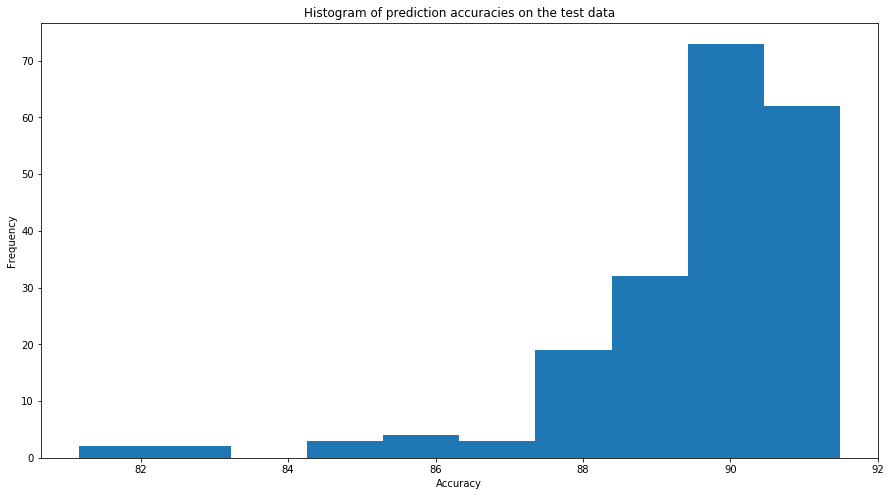

In [68]:
# For each sample we compute the predicted class and compare with the test labels.
# Predicted class is defined as the one which as maximum proability.
# We perform this test for each (w,b) in the posterior giving us a set of accuracies
# Finally we make a histogram of accuracies for the test data.
fig, axes = plt.subplots(figsize = (15, 8))
accy_test = []
for prob in prob_lst:
    y_trn_prd = np.argmax(prob,axis=1).astype(np.float32)
    acc = (y_trn_prd == y_test).mean()*100
    accy_test.append(acc)

axes.hist(accy_test)
axes.set_title("Histogram of prediction accuracies on the test data")
axes.set_xlabel("Accuracy")
axes.set_ylabel("Frequency")


## Conclusion:

<p>We got good results considering the fact that this model</p>